I typically use Python for my data analysis. However, there are many packages which exist only in R. RPy2 allows interaction between R and Python. The installation on OSX wasn't straighforward. The first part of this post explains how I was able to install RPy2 on OSX. In the next part, I give some sample usage.

### Installing RPY2

I assume that R was installed to the default location. First, we need to edit 
```
/opt/local/Library/Frameworks/R.framework/Resources/etc/Makeconf
```

and change the following line 

```
LIBS =  -lpcre -lbz2 -lz -lm -liconv -licuuc -licui18n
``` 

TO

```
LIBS = -lpcre -lbz2 -lz -lm -liconv
```

Next, I used Conda to install rpy2 following instructions on [this Stack Overflow question](http://stackoverflow.com/questions/24987932/installing-rpy2-on-mac-osx-with-anaconda-python-3-4-and-r-3-1-installed-via-macp).

```bash
conda skeleton pypi rpy2
conda build rpy2
conda install rpy2 --use-local
```

### Sample usage

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(10,5))

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 4 days

    After the trial mode has expired, if you want to use mkl thereafter,
    please purchase a license at http://continuum.io
    


In [2]:
df.head()

,0,1,2,3,4
0,0.963307,-0.281300,-0.520679,-0.286363,-0.255438
1,-1.542288,-0.037817,-0.547642,1.044870,-0.661644
2,-0.612678,-0.608626,-0.693424,-0.624682,-0.175600
3,-0.648060,-0.931693,0.573173,-1.380459,-0.042879
4,-1.387869,0.672613,0.247400,-1.200391,0.090957


In [3]:
df.describe()

,0,1,2,3,4
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.589533,0.097112,-0.240116,-0.415101,-0.103734
std,0.836648,0.732541,0.481852,0.887201,0.809402
min,-1.542288,-0.931693,-0.776798,-1.603292,-1.922670
25%,-1.218302,-0.269961,-0.582127,-1.131530,-0.235479
50%,-0.662329,0.056470,-0.485866,-0.455522,-0.022662
75%,-0.394448,0.314926,0.182083,0.099378,0.085802
max,0.963307,1.706653,0.573173,1.044870,1.041965


In [4]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

Creating an R data drame corresponding to `df`

In [5]:
rdf = pandas2ri.py2ri(df)

In [6]:
rdf

<DataFrame - Python:0x113709d40 / R:0x11268bee0>
[Array, Array, Array, Array, Array]
  X0: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x113719758 / R:0x102a910a0>
[0.963307, -1.542288, -0.612678, ..., -1.064134, -0.676597, -0.321705]
  X1: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x1137197a0 / R:0x102a91600>
[-0.281300, -0.037817, -0.608626, ..., 0.361613, 0.174866, 0.150757]
  X2: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x1137199e0 / R:0x1029e3400>
[-0.520679, -0.547642, -0.693424, ..., 0.183424, -0.776798, 0.178062]
  X3: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x113719ab8 / R:0x102997ea8>
[-0.286363, 1.044870, -0.624682, ..., 0.026298, 0.123738, -1.603292]
  X4: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x113719bd8 / R:0x102a6f0a8>
[-0.255438, -0.661644, -0.175600, ..., 1.041965, 0.820075, -1.922670]

In [7]:
print(rdf)

          X0          X1         X2          X3           X4
0  0.9633070 -0.28130038 -0.5206788 -0.28636270 -0.255438435
1 -1.5422880 -0.03781711 -0.5476415  1.04486953 -0.661644193
2 -0.6126779 -0.60862646 -0.6934244 -0.62468221 -0.175599985
3 -0.6480602 -0.93169287  0.5731731 -1.38045865 -0.042878631
4 -1.3878686  0.67261310  0.2473995 -1.20039079  0.090956632
5 -1.2696909  1.70665305 -0.5936222  0.67421425  0.070338141
6  0.6643801 -0.23594333 -0.4510531 -0.92494665 -0.002444698
7 -1.0641337  0.36161283  0.1834236  0.02629836  1.041965300
8 -0.6765971  0.17486631 -0.7767977  0.12373753  0.820074886
9 -0.3217052  0.15075675  0.1780624 -1.60329180 -1.922670085



Now, let us perform some `R` operations on the dataframe

In [8]:
import rpy2.robjects as robjects

From the `rpy2` documentation, 

>The object r in rpy2.robjects represents the running embedded R process.
If familiar with R and the R console, r is a little like a communication channel from Python to R.



### Calling basic `R` functions

* Let us now compute the `head` of our R `dataframe` rdf

In [9]:
head_df = robjects.r['head']

In [10]:
print(head_df(rdf, 2))

         X0          X1         X2         X3         X4
0  0.963307 -0.28130038 -0.5206788 -0.2863627 -0.2554384
1 -1.542288 -0.03781711 -0.5476415  1.0448695 -0.6616442



* Now, let us find the description of the dataframe

In [11]:
r_summary =  robjects.r['summary'](rdf)
print(r_summary)

       X0                X1                 X2                X3          
 Min.   :-1.5423   Min.   :-0.93169   Min.   :-0.7768   Min.   :-1.60329  
 1st Qu.:-1.2183   1st Qu.:-0.26996   1st Qu.:-0.5821   1st Qu.:-1.13153  
 Median :-0.6623   Median : 0.05647   Median :-0.4859   Median :-0.45552  
 Mean   :-0.5895   Mean   : 0.09711   Mean   :-0.2401   Mean   :-0.41510  
 3rd Qu.:-0.3944   3rd Qu.: 0.31493   3rd Qu.: 0.1821   3rd Qu.: 0.09938  
 Max.   : 0.9633   Max.   : 1.70665   Max.   : 0.5732   Max.   : 1.04487  
       X4          
 Min.   :-1.92267  
 1st Qu.:-0.23548  
 Median :-0.02266  
 Mean   :-0.10373  
 3rd Qu.: 0.08580  
 Max.   : 1.04197  



### Using R's lm package for fitting linear models


Let us take the example of linear regression on faithful geyser data set. First, let us load the `R dataset` into Pandas.

In [12]:
faithful_pandas_df = robjects.r('faithful')

In [13]:
type(faithful_pandas_df)

pandas.core.frame.DataFrame

In [14]:
faithful_pandas_df.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


Now, let us create an R dataframe from this Python dataframe. It should be noted that we could have directly used the faithful geyser dataset in R. But, I chose to do this extra conversion for purpose of illustration.

In [15]:
faithful_r_df = pandas2ri.py2ri(faithful_pandas_df)

Let us take the `head` of the R dataframe and confirm that it is the same as the pandas dataframe.

In [16]:
print(robjects.r['head'](faithful_r_df, 5))

  eruptions waiting
1     3.600      79
2     1.800      54
3     3.333      74
4     2.283      62
5     4.533      85



Great, now let us fit a linear relationship bewteen `#eruptions` and `waiting` as follows:
> $$\mathrm{eruptions} = \alpha + \beta\times\mathrm{waiting} + \epsilon$$

For the purpose of this illustration, we will assume that there exists no package for linear regression in Python. So, we will be using the `lm` R `stats` package. Our aim would be to create a function in Python that does the following:

1. Take as inputs a Pandas dataframe and the relationship string (eg. a ~b+c meeans that a is linear on b and c)
2. Use rpy2 interface to convert the Pandas dataframe to R dataframe
3. Use `lm` package from R to fit the linear relationship
4. Find the coefficients of the fit
5. Be able to predict for new data

Since we have already done step 2, we'll jump to step 3

In [17]:
from rpy2.robjects.packages import importr
stats = importr('stats')

In [18]:
fit = stats.lm('eruptions ~ waiting', data=faithful_r_df)

In [19]:
print(fit.names)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        



Let us extract the residuals from the fit R object now.

In [20]:
residuals = fit.rx2('residuals')

Viewing the first five residuals

In [21]:
print(residuals[:5])

[1] -0.50059190 -0.40989320 -0.38945216 -0.53191679 -0.02135959



Getting a NumPy array from the residuals

In [22]:
residuals_numpy = pandas2ri.ri2py(residuals)

In [23]:
residuals_numpy[:5]

array([-0.5005919 , -0.4098932 , -0.38945216, -0.53191679, -0.02135959])

Let us plot a histogram of these residuals using matplotlib now. For a `good` fit, we would expect a normal distributed residual set.

In [24]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

(array([  8.,   9.,  22.,  42.,  32.,  60.,  46.,  34.,  14.,   5.]),
 array([-1.29917268, -1.04992622, -0.80067976, -0.5514333 , -0.30218683,
        -0.05294037,  0.19630609,  0.44555255,  0.69479902,  0.94404548,
         1.19329194]),
 <a list of 10 Patch objects>)

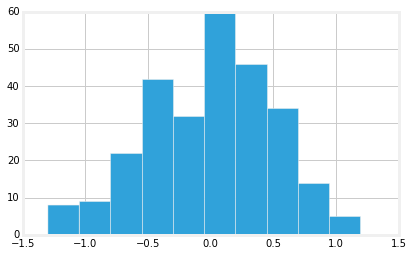

In [25]:
plt.hist(residuals_numpy)

The histogram looks reasonably good.

Now, let us extract the coeffiencts from the linear fit

In [26]:
coeffs = fit.rx2('coefficients')

In [27]:
print(coeffs)

(Intercept)     waiting 
-1.87401599  0.07562795 



In [28]:
type(coeffs)

rpy2.robjects.vectors.FloatVector

In [29]:
coeffs_python = pandas2ri.ri2py(coeffs)

In [30]:
coeffs_python

array([-1.87401599,  0.07562795])

Looks like we lost the names of columns (waiting, etc.) 

In [31]:
coeffs_python_names = pandas2ri.ri2py(coeffs.names).tolist()
coeffs_python_names

['(Intercept)', 'waiting']

Let us now extract the fitted value of `eruptions`

In [32]:
fit_eruptions = pandas2ri.ri2py(fit.rx2('fitted.values'))

Now, let us plot the true and the fitted eruptions in matplotlib.

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


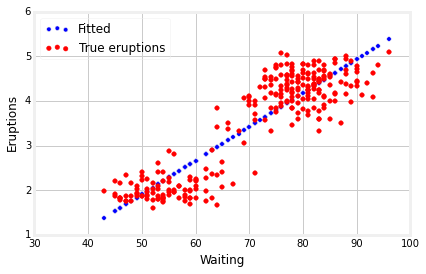

In [33]:
plt.scatter(faithful_pandas_df['waiting'], fit_eruptions, label='Fitted')
plt.scatter(faithful_pandas_df['waiting'], faithful_pandas_df['eruptions'], label='True eruptions', color='r')
plt.legend(loc='upper left')
plt.xlabel("Waiting")
plt.ylabel("Eruptions")

Now, let us predict using the learnt linear model on last five entries in the dataset.

In [34]:
last_5 = robjects.r['tail'](faithful_r_df, 5)

In [35]:
print(last_5)

    eruptions waiting
268     4.117      81
269     2.150      46
270     4.417      90
271     1.817      46
272     4.467      74



In [36]:
pred_r = stats.predict(fit, newdata=last_5)

In [37]:
print(pred_r)

     268      269      270      271      272 
4.251848 1.604870 4.932499 1.604870 3.722452 



In [38]:
pred_python = pandas2ri.ri2py(pred_r)
pred_python

array([ 4.2518478 ,  1.60486962,  4.93249933,  1.60486962,  3.72245216])

Great! Now that we are able to fit a model and also predict on it, let us now package this function similar to the scikit-learn API

In [39]:
class PYLM(object):
    from rpy2.robjects import pandas2ri
    pandas2ri.activate()
    from rpy2.robjects.packages import importr
    stats = importr('stats')
    def convert_fit_to_python(self, fit):
        coeffs_r = fit.rx2('coefficients')
        coeffs= pandas2ri.ri2py(coeffs_r)
        coeff_names =  pandas2ri.ri2py(coeffs_r.names).tolist()
        coeff_series = pd.Series({k:v for k,v in zip(coeff_names, coeffs)})
        fitted_values = pandas2ri.ri2py(fit.rx2('fitted.values'))
        return coeff_series
        
    def fit(self, relationship, df):
        """
        relationship: string of the form: a~b+c
        df: Pandas Dataframe
        """
        # Get R dataframe
        r_df = pandas2ri.py2ri(df)
        # Create linear fit
        fit = stats.lm(relationship, data=df)
        self.fit = fit
        python_fit = self.convert_fit_to_python(fit)
        return python_fit
    
    def predict(self, df):
        pred_r = stats.predict(self.fit, newdata=df)
        pred_python = pandas2ri.ri2py(pred_r)
        return pred_python
        
        

In [40]:
pylm = PYLM()
relationship='eruptions~waiting'
pylm.fit(relationship, faithful_pandas_df)

(Intercept)   -1.874016
waiting        0.075628
dtype: float64

In [41]:
pylm.predict(faithful_pandas_df.tail(5))

array([ 4.2518478 ,  1.60486962,  4.93249933,  1.60486962,  3.72245216])

Great, this means that we've now been able get the functionality of R's `lm` package! Now, let us take a more complex example, and this time let us do seasonal trend decomposition. I'll be following [this simple to follow tutorial](http://www.r-bloggers.com/seasonal-trend-decomposition-in-r/) for the R code.

In [42]:
print rdf

          X0          X1         X2          X3           X4
0  0.9633070 -0.28130038 -0.5206788 -0.28636270 -0.255438435
1 -1.5422880 -0.03781711 -0.5476415  1.04486953 -0.661644193
2 -0.6126779 -0.60862646 -0.6934244 -0.62468221 -0.175599985
3 -0.6480602 -0.93169287  0.5731731 -1.38045865 -0.042878631
4 -1.3878686  0.67261310  0.2473995 -1.20039079  0.090956632
5 -1.2696909  1.70665305 -0.5936222  0.67421425  0.070338141
6  0.6643801 -0.23594333 -0.4510531 -0.92494665 -0.002444698
7 -1.0641337  0.36161283  0.1834236  0.02629836  1.041965300
8 -0.6765971  0.17486631 -0.7767977  0.12373753  0.820074886
9 -0.3217052  0.15075675  0.1780624 -1.60329180 -1.922670085



In [43]:
r_stl = robjects.r['stl']
r_ts = robjects.r['ts']

In [44]:
import datetime
data = np.arange(85.) / 12.
data = np.sin(data * (2*np.pi))
data += np.arange(85.) / 12. * .5
data += .1 * np.random.randn(85)
idx = pd.DatetimeIndex(start=datetime.datetime(1999,1,1), freq='1M', periods=len(data))
data = pd.Series(data, index=idx)

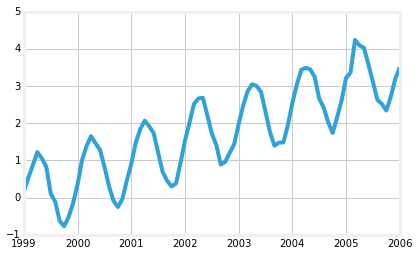

In [45]:
data.plot()

In [46]:
data.index[0]
data.index.freq

<MonthEnd>

In [47]:
#start=c(2009, 1)
start = robjects.IntVector([2009,1,1, 1, 1, 1])

In [48]:
data.index.freq.freqstr

'M'

So, Pandas uses human understandable frequency formatting. We'll need to conver

In [49]:
def convert_pd_freqstr(df):
    """
    df: pd.DataFrame with pd.DatetimeIndex type index
    """
    freqstr = df.index.freq.freqstr
    freq_interval = freqstr[-1]
    if len(freqstr)>1:
        freq_number = int(freqstr[:-1])
    else:
        freq_number=1
    if freq_interval is 'Y':
        return 1.0/freq_number
    elif freq_interval is 'M':
        return 12.0/freq_number
    elif freq_interval is 'D':
        return 365.0/freq_number


In [50]:
convert_pd_freqstr(data)

12.0

In [51]:
r_ts_data = r_ts(robjects.FloatVector(np.asarray(data)), start=start, frequency=convert_pd_freqstr(data))

In [52]:
print(r_ts_data)

             Jan         Feb         Mar         Apr         May         Jun
2009  0.16943524  0.53425199  0.87250497  1.22217028  1.05999610  0.82930551
2010  0.35782219  1.01503459  1.38844413  1.64925016  1.46447686  1.28478018
2011  0.90896836  1.47564744  1.84029756  2.06847648  1.91617956  1.73489428
2012  1.52790674  2.01015855  2.51359619  2.66490972  2.68316116  2.21023112
2013  1.97844281  2.47300245  2.85661112  3.04595475  3.00147089  2.84007779
2014  2.54377350  3.03777785  3.43471835  3.48832741  3.44694497  3.23920779
2015  3.22025091  3.36038182  4.23750575  4.09113800  4.02320996  3.58145558
2016  3.49900048                                                            
             Jul         Aug         Sep         Oct         Nov         Dec
2009  0.10172981 -0.10944249 -0.62819742 -0.76932013 -0.51940419 -0.14890866
2010  0.83161918  0.31744202 -0.07618286 -0.25403330 -0.04095414  0.45926597
2011  1.20966918  0.69608508  0.45529244  0.30011032  0.38101713  0.93020767

Let us plot this time series using `ggplot2`

In [53]:
import rpy2.robjects.lib.ggplot2 as ggplot2

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/rpy2/robjects/lib/ggplot2.py:59: UserWarning: This was designed againt ggplot2 version 1.0.1 but you have 2.0.0
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/rpy2/robjects/environments.py:17: UserWarning: Error: object 'stat_abline' not found

  res = super(Environment, self).__getitem__(item)


LookupError: 'stat_abline' not found

Looks like I don't have `ggplot2` installed. The normal route would be to fire up the R terminal and to install the package up there. Instead, let us write a small function that will install an R package. It must be noted that this will be installed via the rpy2 interface. This will also serve as a nice example of calling custom R code in Python using the rpy2 interface.

In [54]:
install_package = robjects.r("""
 function(name){
 install.packages(name)
 }
""")

In [56]:
install_package('ggplot2')

--- Please select a CRAN mirror for use in this session ---


/Users/nipunbatra/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Installing package into ‘/Users/nipunbatra/Library/R/3.2/library’
(as ‘lib’ is unspecified)

  res = super(Function, self).__call__(*new_args, **new_kwargs)


HTTPS CRAN mirror 

 1: 0-Cloud [https]                2: Austria [https]             
 3: Chile [https]                  4: China (Beijing 4) [https]   
 5: Colombia (Cali) [https]        6: France (Lyon 2) [https]     
 7: France (Paris 2) [https]       8: Germany (Münster) [https]   
 9: Iceland [https]               10: Italy (Padua) [https]       
11: Japan (Tokyo) [https]         12: Mexico (Mexico City) [https]
13: Russia (Moscow) [https]       14: Spain (A Coruña) [https]    
15: Spain (Madrid) [https]        16: Switzerland [https]         
17: UK (Bristol) [https]          18: UK (Cambridge) [https]      
19: USA (CA 1) [https]            20: USA (KS) [https]            
21: USA (MI 1) [https]            22: USA (TN) [https]            
23: USA (TX) [https]              24: USA (WA) [https]            
25: (HTTP mirrors)                

Selection: 11


/Users/nipunbatra/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: trying URL 'https://cran.ism.ac.jp/src/contrib/ggplot2_2.0.0.tar.gz'

  res = super(Function, self).__call__(*new_args, **new_kwargs)


KeyboardInterrupt: 


The downloaded source packages are in
	‘/private/var/folders/f4/kky9_80570ndrfzk8805mxh00000gp/T/RtmpxYv3rW/downloaded_packages’


rpy2.rinterface.NULL

In [ ]:
import rpy2.robjects.lib.ggplot2 as ggplot2

Oops, turns out that we have a newer version of ggplot2 than what rpy2 likes :(
But, if we can use ggplot2 in a custom R script, like, we installed it? [This page](http://rpubs.com/sinhrks/plot_ts) is a really nice resource on plotting time series data in R. 

In [279]:
install_package("devtools")

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: also installing the dependencies ‘BH’, ‘mime’, ‘R6’, ‘brew’, ‘xml2’, ‘httr’, ‘curl’, ‘memoise’, ‘whisker’, ‘evaluate’, ‘rstudioapi’, ‘jsonlite’, ‘roxygen2’, ‘rversions’, ‘git2r’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: trying URL 'https://cran.fhcrc.org/src/contrib/BH_1.60.0-1.tar.gz'

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning:  length 9618456 bytes (9.2 MB)

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: downloaded 9.2 MB


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/nipunbatra/anaconda/lib/python2.7/sit


The downloaded source packages are in
	‘/private/var/folders/f4/kky9_80570ndrfzk8805mxh00000gp/T/RtmpIpTrsL/downloaded_packages’


/Users/nipunbatra/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: downloaded 153 KB


  res = super(Function, self).__call__(*new_args, **new_kwargs)


rpy2.rinterface.NULL

In [281]:
install_package_github = robjects.r("""
 library(devtools)
 function(name){
 install_github(name)
 }
""")

install_package_github('sinhrks/ggfortify')

ERROR: An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



RRuntimeError: Error in library(devtools) : there is no package called ‘devtools’


In [282]:
gr = importr('grDevices')
autoplot = robjects.r("""
 library(ggplot2)
    
 function(ts_data){
 autoplot(ts_data)
 }
""")

In [283]:
autoplot(r_ts_data)

RRuntimeError: Error: Objects of type ts not supported by autoplot.


In [57]:
r_plot = robjects.r("""
 function(data, filename){
 png(filename=filename)
 plot(data)
 dev.off()}
""")

In [96]:
r_plot(r_ts_data, "/Users/nipunbatra/Desktop/ts_1.png")

<IntVector - Python:0x114c59560 / R:0x1368f9748>
[       1]

In [97]:
from IPython.display import Image

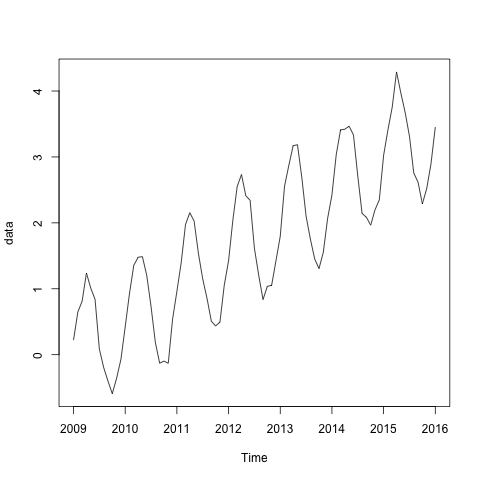

In [98]:
Image("/Users/nipunbatra/Desktop/ts_1.png")

In [99]:
r_ts_decomposed = r_stl(r_ts_data, 12)

In [100]:
r_plot(r_ts_decomposed, "/Users/nipunbatra/Desktop/decomposed.png")

<IntVector - Python:0x1183488c0 / R:0x134cfce68>
[       1]

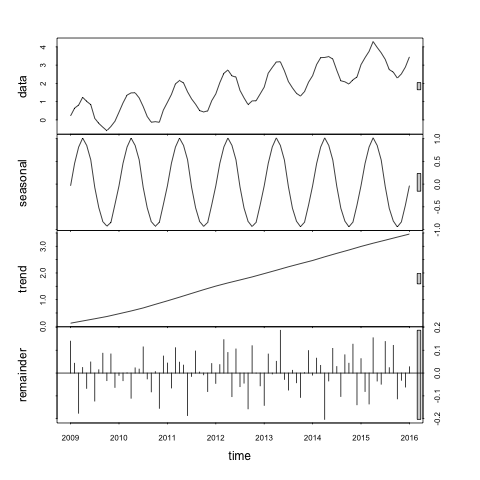

In [101]:
Image("/Users/nipunbatra/Desktop/decomposed.png")

This looks great. Let us now write a small Python class which takes in a Pandas timeseries and uses R's stl for decomposition and returns a dataframe consisting of data and three other timeseries.

In [55]:
class PYSTL(object):
    
    def convert_pd_freqstr(df):
    
        freqstr = df.index.freq.freqstr
        freq_interval = freqstr[-1]
        if len(freqstr)>1:
            freq_number = int(freqstr[:-1])
        else:
            freq_number=1
        if freq_interval is 'Y':
            return 1.0/freq_number
        elif freq_interval is 'M':
            return 12.0/freq_number
        elif freq_interval is 'D':
            return 365.0/freq_number


    def decompose(self, ser, np=12):
        from rpy2 import robjects
        from numpy import asarray
        
        r_stl = robjects.r['stl']
        r_ts = robjects.r['ts']
        start = robjects.IntVector([ser.index[0].year, ser.index[0].month, ser.index[0].day])
        freq = convert_pd_freqstr(ser)
        r_ts_data = r_ts(robjects.FloatVector(asarray(ser)), start=start, frequency=freq)
        r_decomposed = r_stl(r_ts_data, freq)
        res_ts = asarray(r_decomposed[0])
        res_ts = pd.DataFrame({"data":data,
                                    "seasonal" : pd.Series(res_ts[:,0],
                                                           index=data.index),
                                   "trend" : pd.Series(res_ts[:,1],
                                                           index=data.index),
                                   "remainder" : pd.Series(res_ts[:,2],
                                                           index=data.index)})
        
        res_ts = res_ts[['data','seasonal','trend','remainder']]
        self.decomposed = res_ts
        return res_ts
    
    def plot(self, **kwargs):
        ax = self.decomposed.plot(subplots=True, legend=False, **kwargs)
        plt.tight_layout()
        ax[0].set_ylabel("data")
        ax[1].set_ylabel("seasonal")
        ax[2].set_ylabel("trend")
        ax[3].set_ylabel("remainder")
        ax[3].set_xlabel("Time")
        

        

In [56]:
pystl = PYSTL()

In [57]:
pystl.decompose(data).head()

,data,seasonal,trend,remainder
1999-01-31,0.169435,0.005781,0.070873,0.092782
1999-02-28,0.534252,0.453568,0.098853,-0.018169
1999-03-31,0.872505,0.837424,0.126834,-0.091753
1999-04-30,1.222170,0.995964,0.154815,0.071392
1999-05-31,1.059996,0.856832,0.184331,0.018833


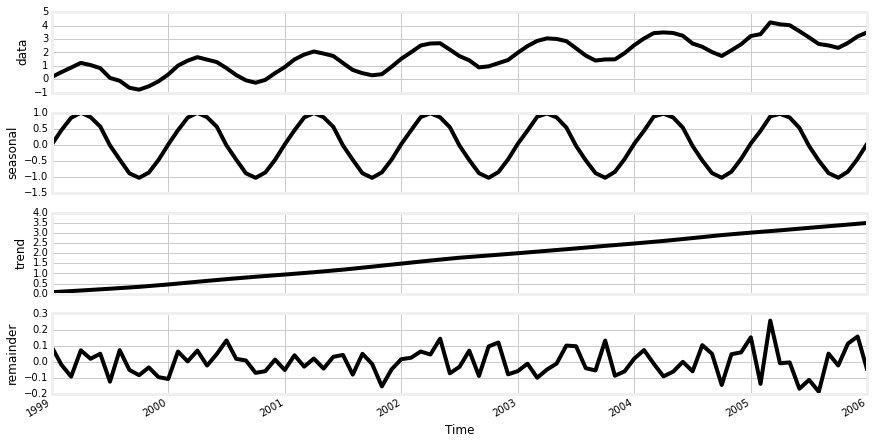

In [58]:
pystl.plot(figsize=(12,6))

In [65]:
find_freq_r = robjects.r("""
find.freq <- function(x)
{
    n <- length(x)
    spec <- spec.ar(c(x),plot=FALSE)
    if(max(spec$spec)>10) # Arbitrary threshold chosen by trial and error.
    {
        period <- round(1/spec$freq[which.max(spec$spec)])
        if(period==Inf) # Find next local maximum
        {
            j <- which(diff(spec$spec)>0)
            if(length(j)>0)
            {
                nextmax <- j[1] + which.max(spec$spec[j[1]:500])
                period <- round(1/spec$freq[nextmax])
            }
            else
                period <- 1
        }
    }
    else
        period <- 1
    return(period)
}
""")

In [ ]:
find_freq_r = robjects.r("""
find.freq <- function(x)
{
    n <- length(x)
    spec <- spec.ar(c(x),plot=FALSE)
    if(max(spec$spec)>10) # Arbitrary threshold chosen by trial and error.
    {
        period <- round(1/spec$freq[which.max(spec$spec)])
        if(period==Inf) # Find next local maximum
        {
            j <- which(diff(spec$spec)>0)
            if(length(j)>0)
            {
                nextmax <- j[1] + which.max(spec$spec[j[1]:500])
                period <- round(1/spec$freq[nextmax])
            }
            else
                period <- 1
        }
    }
    else
        period <- 1
    return(period)
}
""")

In [66]:
def find_freq(data):
    r_data = pandas2ri.py2ri(data)
    return find_freq_r(r_data)[0]

In [67]:
find_freq(data[:])

11.0

In [153]:
ser = data.copy()
from rpy2 import robjects
from numpy import asarray
r_stl = robjects.r['stl']
r_ts = robjects.r['ts']
start = robjects.IntVector([ser.index[0].year, ser.index[0].month, ser.index[0].day])
freq = convert_pd_freqstr(ser)
r_ser = r_ts(robjects.FloatVector(asarray(ser)), start=start, frequency=int(freq))

In [158]:
r_ser

<FloatVector - Python:0x11f222ea8 / R:0x11f308b00>
[0.220280, 0.646351, 0.811693, ..., 2.517668, 2.894672, 3.453496]

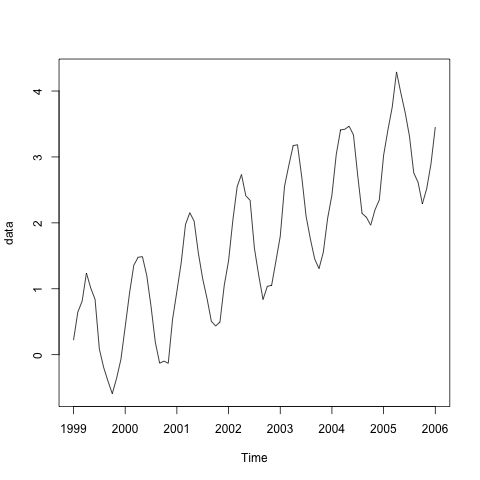

In [155]:
r_plot(r_ser, "/Users/nipunbatra/Desktop/test.png")
Image("/Users/nipunbatra/Desktop/test.png")

In [237]:
robjects.r['stl'](rd, 12)

RRuntimeError: Error in (function (x, s.window, s.degree = 0, t.window = NULL, t.degree = 1,  : 
  series is not periodic or has less than two periods


In [224]:
robjects.r['stl'](nottem_ser,7)

RRuntimeError: Error in (function (x, s.window, s.degree = 0, t.window = NULL, t.degree = 1,  : 
  series is not periodic or has less than two periods
